In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

Set Weights for Different Objectives

In [16]:
w1 = .25 # German government
w2 = .25 # Danish government
w3 = .25 # Environmental agencies
w4 = .25 # Contractors


def objective_p1(x1, x2):
    """
    Objective to minimize the costs per tunnel element in million euros.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    """

    return pchip_interpolate([10, 55, 100], [100, 50 , 0], (x1 + x2))


def objective_p2(x1, x2):
    """
    Objective to maximize the capacity in cars per minutes.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    """

    return pchip_interpolate([50, 70, 90], [0, 50, 100], (x1))

def objective_p3(x1, x2):
    """
    Objective to minimize the ecological impact.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    """

    return pchip_interpolate([10, 50, 90], [0, 50, 100], (x2))

def objective_p4(x1, x2):
    """
    Objective to maximize project scale(maximize profit).

    :param x1: 1st design variable
    :param x2: 2nd design variable
    """

    return pchip_interpolate([10, 50, 90], [0, 50, 100], (x1 + x2))

def objective(variables):
    """
    Objective function that is fed to the GA. Calles the separate preference functions that are declared above.

    :param variables: array with design variable values per member of the population. Can be split by using array
    slicing
    :return: 1D-array with aggregated preference scores for the members of the population.
    """
    # extract 1D design variable arrays from full 'variables' array
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    # calculate the preference scores
    p_1 = objective_p1(x1, x2)
    p_2 = objective_p2(x1, x2)
    p_3 = objective_p3(x1, x2)
    p_4 = objective_p4(x1, x2)

    # aggregate preference scores and return this to the GA
    return [w1, w2, w3, w4], [p_1, p_2, p_3, p_4]

Define Constraints and Bounds


In [17]:
def constraint_1(variables):
    """Constraint that the lane width should be at least 250 centimeters.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    return -(x1) + 200  # < 0


def constraint_2(variables):
    """Constraint that the lane width cannot surpass 500 centimeters.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    return x1 - 500  # < 0

def constraint_3(variables):
    """Constraint that the element should be at least 50 meters.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    return -(x2) + 50  # < 0

def constraint_4(variables):
    """Constraint that the element length cannot surpass 500 meters.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]

    return (x2) - 500  # < 0


# define list with constraints
cons = [['ineq', constraint_1], ['ineq', constraint_2], ['ineq', constraint_3], ['ineq', constraint_4]]

# set bounds for all variables
b1 = [200, 500]  # x1
b2 = [50, 500]  # x2
bounds = [b1, b2]

Graphical Output


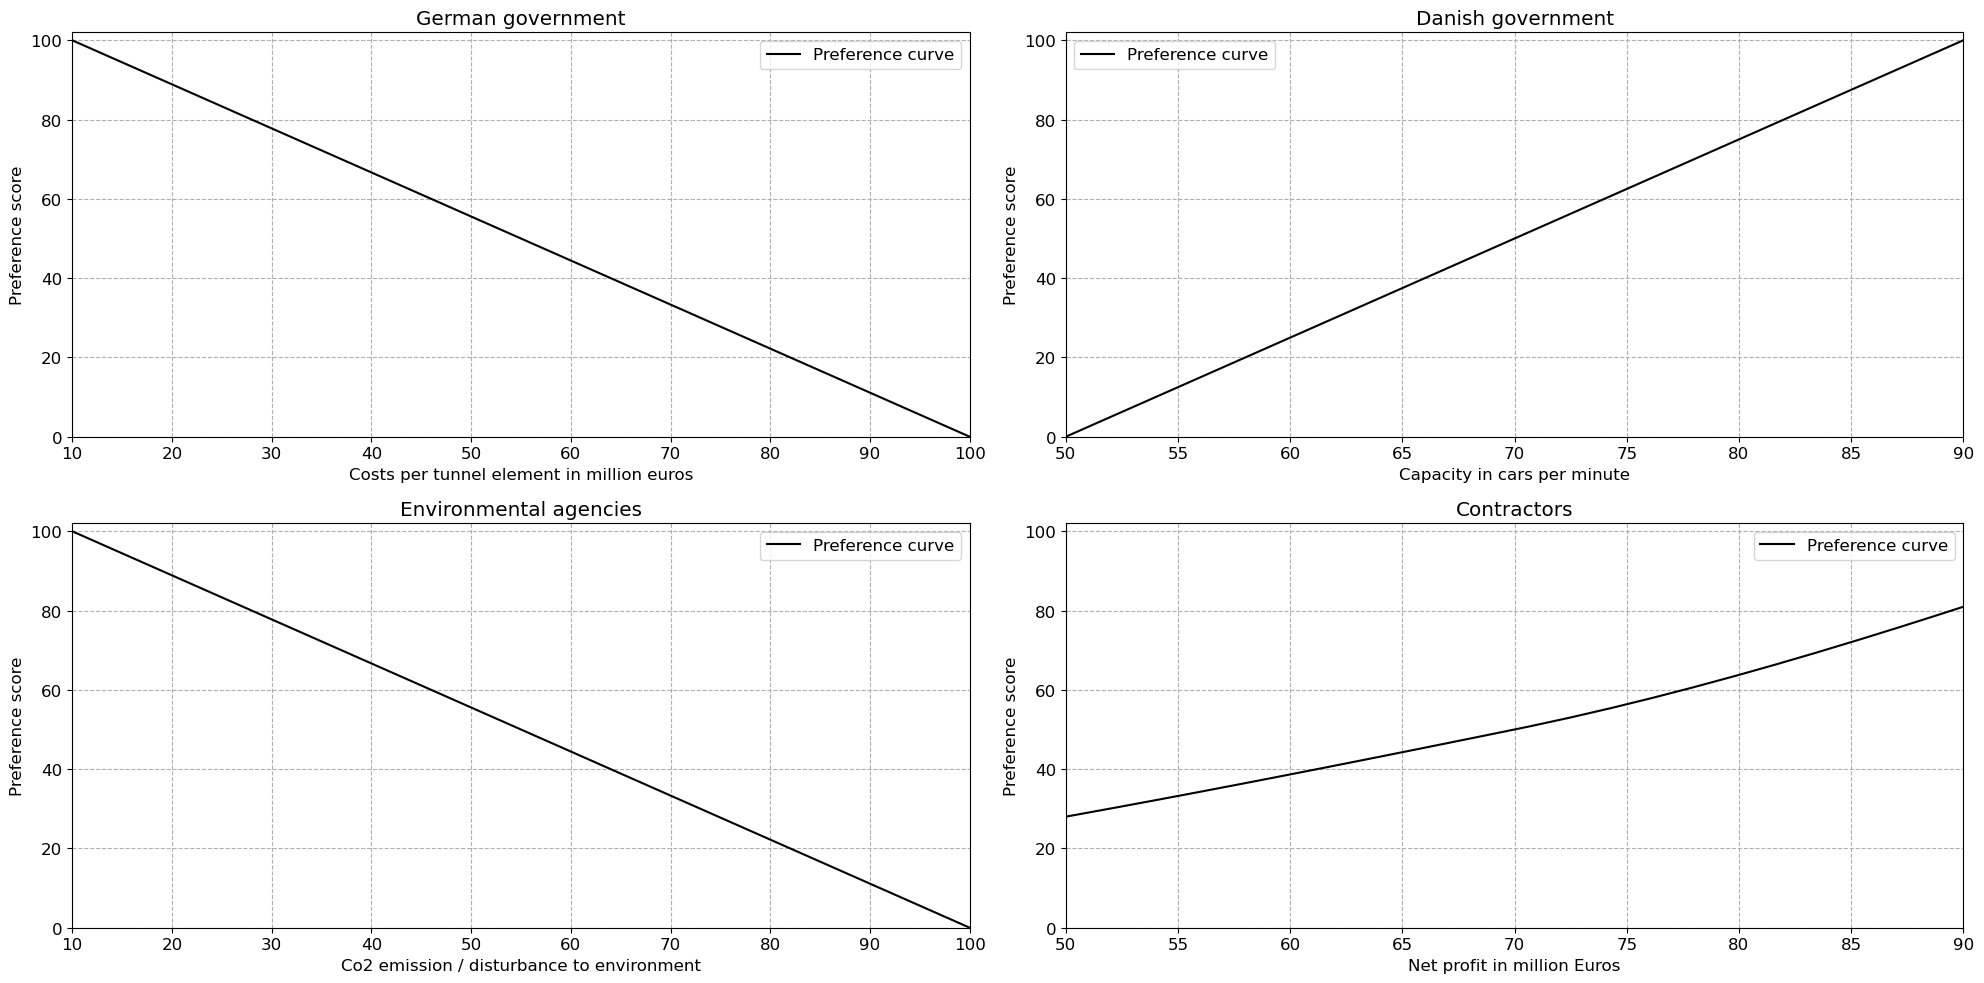

In [20]:
# create arrays for plotting continuous preference curves
c1 = np.linspace(10, 100)
c2 = np.linspace(50, 90)
c3 = np.linspace(10,100)
c4 = np.linspace(10,100)

# calculate the preference functions
p1 = pchip_interpolate([10, 55, 100], [100, 50, 0], (c1))
p2 = pchip_interpolate([50, 70, 90], [0, 50, 100], (c2))
p3 = pchip_interpolate([10, 55, 100], [100, 50, 0], (c3))
p4 = pchip_interpolate([10, 70, 100], [0, 50, 100], (c4))


# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((20,10)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(c1, p1, label='Preference curve', color='black')

ax1.set_xlim((10, 100))
ax1.set_ylim((0, 102))
ax1.set_title('German government')
ax1.set_xlabel('Costs per tunnel element in million euros')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.grid(linestyle = '--')

#fig = plt.figure()
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(c2, p2, label='Preference curve', color='black')
ax2.set_xlim((50, 90))
ax2.set_ylim((0, 102))
ax2.set_title('Danish government')
ax2.set_xlabel('Capacity in cars per minute')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(c3, p3, label='Preference curve', color='black')
ax3.set_xlim((10, 100))
ax3.set_ylim((0, 102))
ax3.set_title('Environmental agencies')
ax3.set_xlabel('Co2 emission / disturbance to environment')
ax3.set_ylabel('Preference score')
ax3.grid()
ax3.legend()
ax3.grid(linestyle = '--')

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(c4, p4, label='Preference curve', color='black')
ax4.set_xlim((50, 90))
ax4.set_ylim((0, 102))
ax4.set_title('Contractors')
ax4.set_xlabel('Net profit in million Euros')
ax4.set_ylabel('Preference score')
ax4.grid()
ax4.legend()
ax4.grid(linestyle = '--')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.tight_layout()


Optimization

Now we have everything for the optimization, we can run it. For more information about the different options to configure the GA, see the docstring of GeneticAlgorithm (via help()) or chapter 4 of the reader. Once we have the results, we can make some figures. First, the resulting design variables are plotted into the solution space. Secondly, we can plot the preference functions together with the results of the optimizations.



Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            77.7344      171.0553         0            0.01         0           
1            67.6432      99.903           0            0.14         0           
2            67.6432      79.7562          1            0.168        0           
3            66.6667      73.3285          0            0.45         0           
4            66.6667      71.3232          1            0.452        0           
5            66.6667      70.2337          2            0.457        0           
6            66.6667      70.208           3            0.452        0           
7            66.6667      69.1029          4            0.465        0           
8            66.6667      70.1286          5            0.465        0           
9            66.6667      70.0124          6            0.453        0           
10           66.6667

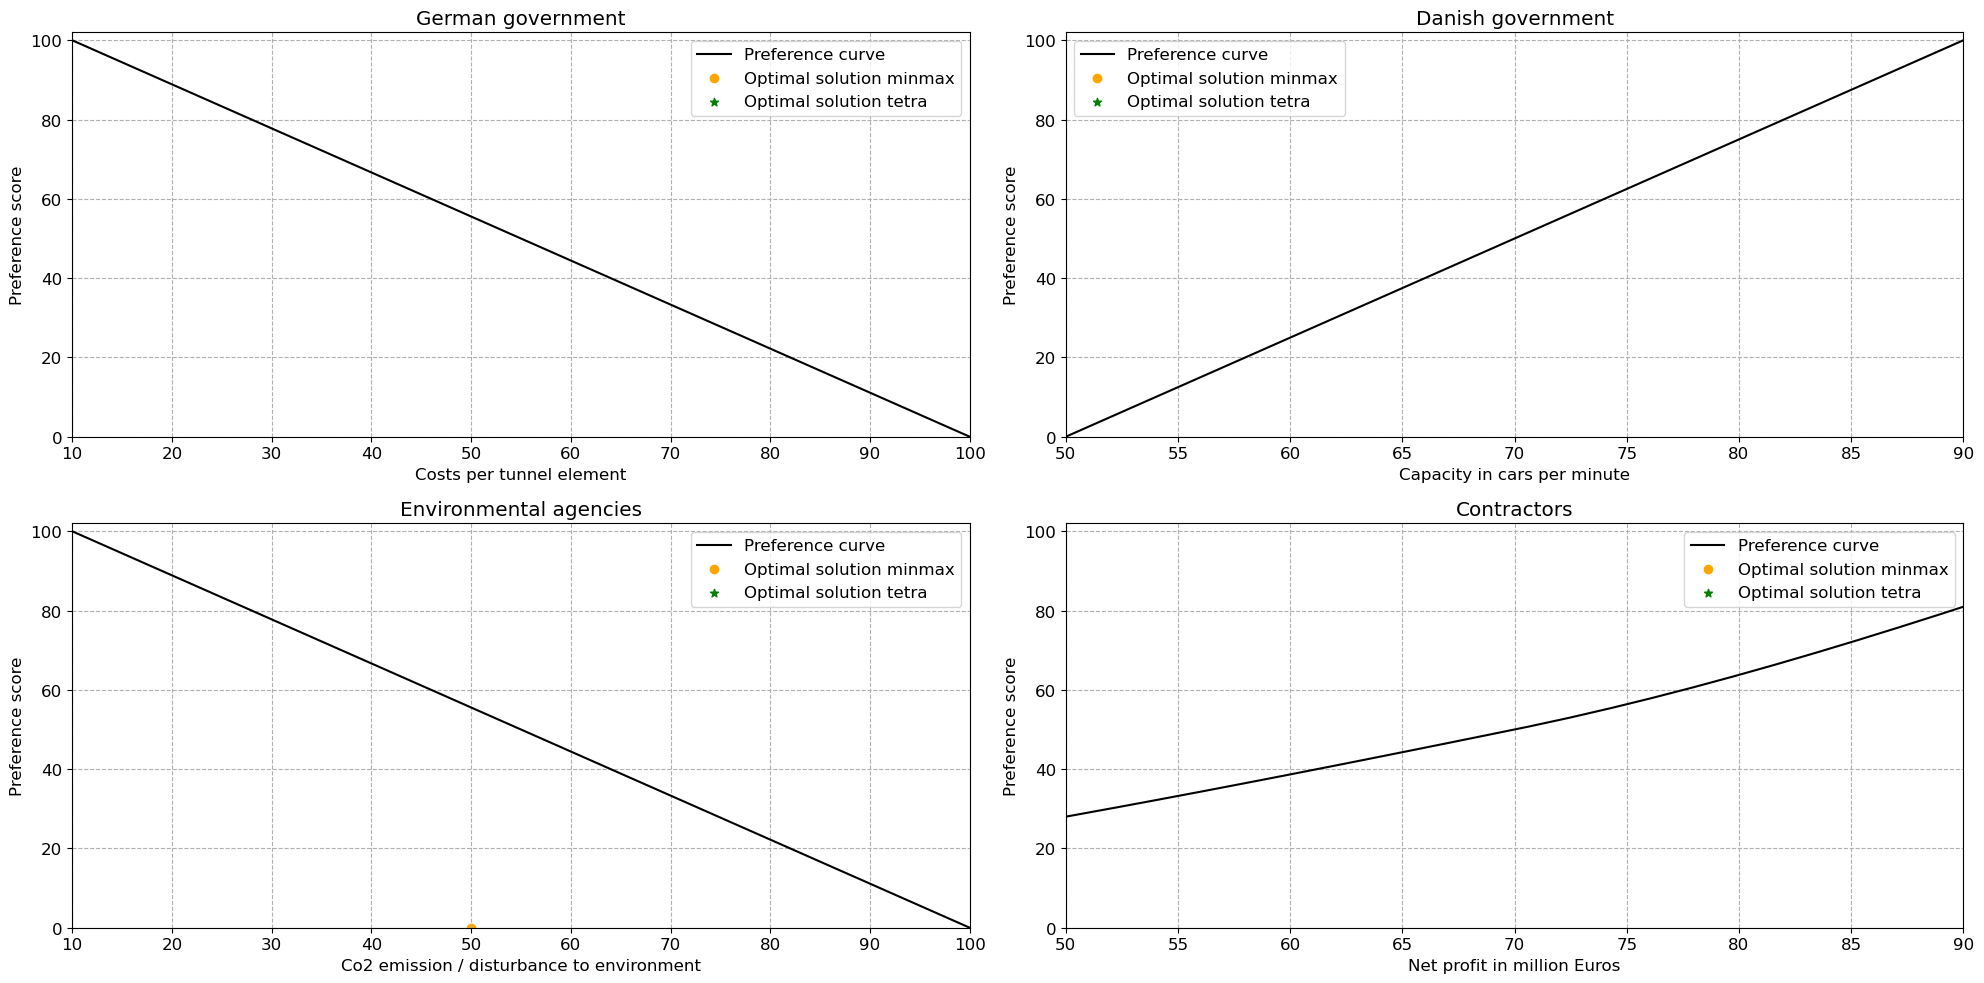

In [ ]:
# We run the optimization with two paradigms
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange','green']

# Coefficients
coef1 = 0.9/3
coef2 = 0.2/3
coef3 = 0.8/3
coef4 = 1.1/3
coef5 = 0.4/3
coef6 = 1.2/3
coef7 = 0.5/3
coef8 = 0.3/3
coef9 = 0.1/3


# The figure and axes are defined before the loop
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

for i in range(2):
    # make dictionary with parameter settings for the GA run with the IMAP solver
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': paradigm[i], # minmax or tetra
        'var_type': 'real'
    }

    # run the GA and print its result
    print(f'Run GA with ' + paradigm[i])
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    print(f'Optimal result for x1 = {round(design_variables_IMAP[0], 2)} lanes and '
          f'x2 = {round(design_variables_IMAP[1], 2)} centimeters of lanewidth and ')

    costs = round(design_variables_IMAP[0] + design_variables_IMAP[1])
    print(f'costs: {costs}')

    capacity = round(design_variables_IMAP[0])
    print(f'capacity: {capacity}')

    ecological_impact = round(design_variables_IMAP[1])
    print(f'capacity: {ecological_impact}')

    net_profit = round(design_variables_IMAP[0] + design_variables_IMAP[1])
    print(f'Net profit is:{net_profit}')

    # Calculate individual preference scores for the GA results
    c1_res = design_variables_IMAP[0] + design_variables_IMAP[1]
    p1_res = pchip_interpolate([10, 30, 100], [100, 60, 0], (c1_res))

    c2_res = design_variables_IMAP[0]
    p2_res = pchip_interpolate([50, 70, 90], [0, 50, 100], (c2_res))

    c3_res = design_variables_IMAP[1]
    p3_res = pchip_interpolate([50, 70, 90], [0, 50, 100], (c3_res))

    c4_res = design_variables_IMAP[0] + design_variables_IMAP[1]
    p4_res = pchip_interpolate([50, 70, 90], [0, 50, 100], (c4_res))

    # Debugging prints to check the calculated values
    print(f"c1_res: {c1_res}, p1_res: {p1_res}")
    print(f"c2_res: {c2_res}, p2_res: {p2_res}")
    print(f"c3_res: {c3_res}, p1_res: {p3_res}")
    print(f"c4_res: {c4_res}, p2_res: {p4_res}")

    # Plot the preference curves
    if i == 0:  # Only plot curves once
        c1 = np.linspace(10, 100)
        c2 = np.linspace(50, 90)
        c3 = np.linspace(10,100)
        c4 = np.linspace(10,100)

        # calculate the preference functions
        p1 = pchip_interpolate([10, 55, 100], [100, 50, 0], (c1))
        p2 = pchip_interpolate([50, 70, 90], [0, 50, 100], (c2))
        p3 = pchip_interpolate([10, 55, 100], [100, 50, 0], (c3))
        p4 = pchip_interpolate([10, 70, 100], [0, 50, 100], (c4))

        ax1.plot(c1, p1, label='Preference curve', color='black')
        ax1.set_xlim((10, 100))
        ax1.set_ylim((0, 102))
        ax1.set_title('German government')
        ax1.set_xlabel('Costs in million Euros')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        ax2.plot(c2, p2, label='Preference curve', color='black')
        ax2.set_xlim((50, 90))
        ax2.set_ylim((0, 102))
        ax2.set_title('Danish government')
        ax2.set_xlabel('Capacity in cars per minute')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')

        ax3.plot(c3, p3, label='Preference curve', color='black')
        ax3.set_xlim((10, 100))
        ax3.set_ylim((0, 102))
        ax3.set_title('Environmental agencies')
        ax3.set_xlabel('Co2 emission / disturbance to environment')
        ax3.set_ylabel('Preference score')
        ax3.grid()
        ax3.legend()
        ax3.grid(linestyle = '--')

        ax4.plot(c4, p4, label='Preference curve', color='black')
        ax4.set_xlim((50, 90))
        ax4.set_ylim((0, 102))
        ax4.set_title('Contractors')
        ax4.set_xlabel('Net profit in million Euros')
        ax4.set_ylabel('Preference score')
        ax4.grid()
        ax4.legend()
        ax4.grid(linestyle = '--')

    # Scatter the results on the preference curve plots
    ax1.scatter(c1_res, p1_res, label='Optimal solution ' + paradigm[i], color= colours[i], marker=marker[i])
    ax2.scatter(c2_res, p2_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax3.scatter(c3_res, p3_res, label='Optimal solution ' + paradigm[i], color= colours[i], marker=marker[i])
    ax4.scatter(c4_res, p4_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])

# Add legends and adjust layout after plotting all data points
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.tight_layout()

# Display the plot
plt.show()